In [11]:
token="5fcede80279c4476a43df2cd72e70bf7"
import sys
sys.argv.append("--ident="+token)

In [12]:
import Turbulence.Datasets
import Turbulence.Filters
import matplotlib.pyplot as plt
import numpy as np
import inspect as inspect

In [19]:
iso = Turbulence.Datasets.getDataset('isotropic1024coarse')

vField = iso.fields[0]
pField = iso.fields[1]
t0=0
twidth=1
# DEBUG
x0=0
y0=0
z0=0
xdim=1024
ydim=1024
zdim=1024
x1=x0
y1=y0+ydim
z1=z0

stride=1

getReaderFromMyDB POST response:  200 OK
executeQuery POST response:  200 OK
   DatasetID      dt  thigh  xhigh  yhigh  zhigh
0          4  0.0002   1025   1024   1024   1024
executeQuery POST response:  200 OK
   DatafieldID       name  DatasetID charname  components   longname tablename
0            7        vel          4        u           3   velocity       vel
1            8         pr          4        p           1        NaN        pr
2           15  vorticity          4        w           3  vorticity       vel


In [24]:
#reader = isoFine.getFieldReader(pField, t0, twidth, 0, 0, 0, xdim,ydim,zdim)
reader = Turbulence.Datasets.FieldReader(iso, vField, t0, twidth, x0, y0,z0, xdim,ydim,zdim,strideSpace=stride)
npArr = reader.read()
#reshape for plotting purposes
#rsh = npArr.reshape((xdim/stride,ydim/stride,zdim/stride))
rsh0 = npArr.reshape((zdim/stride,ydim/stride,xdim/stride, 3))

#reader = isoFine.getFieldReader(pField, t0, twidth, 0, 0, 0, xdim,ydim,zdim)
reader = Turbulence.Datasets.FieldReader(iso, vField, t0, twidth, x1, y1, z1, xdim,ydim,zdim,strideSpace=stride)
npArr = reader.read()
#reshape for plotting purposes
#rsh = npArr.reshape((xdim/stride,ydim/stride,zdim/stride))
rsh = npArr.reshape((zdim/stride,ydim/stride,xdim/stride, 3))


getReaderFromMyDB POST response:  200 OK
getReaderFromMyDB POST response:  200 OK


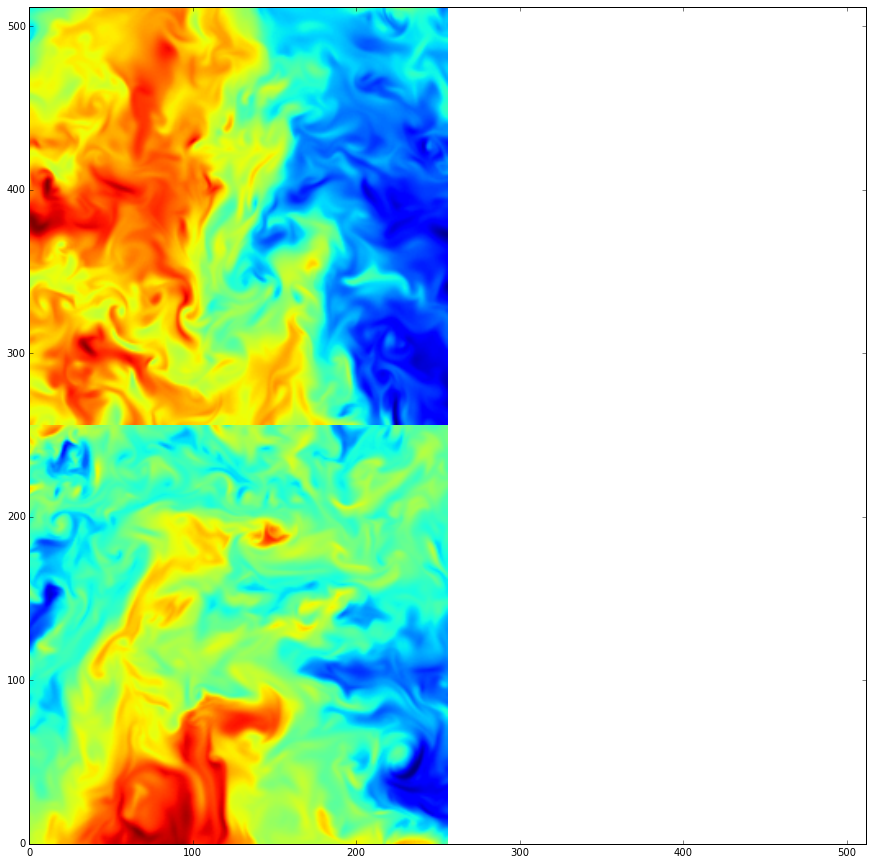

In [25]:
zslice=zdim/2

# Plot u3 & u1 velocity at zslice.
plt.figure(figsize=(15, 15))
plt.imshow(rsh0[0,:,:,2],extent=[x0,x0+xdim,y0,y0+ydim])
#plt.title('isotropic1024 u3 velocity as function of x,y at zdim/2')
plt.imshow(rsh[0,:,:,2],extent=[x1,x1+xdim,y1,y1+ydim])
#plt.title('isotropic1024 u3 velocity as function of x,y at zdim/2')
plt.axis([0,512,0,512])

plt.show()

In [ ]:
zslice=zdim/2

# Plot u3 & u1 velocity at zslice.
plt.figure(figsize=(15, 15))
plt.subplot(2,2,1)
cMeshPlot = plt.pcolormesh(rsh[zslice,:,:,2])
#plt.imshow()
plt.title('isotropic1024 u3 velocity as function of x,y at zdim/2')
#plt.axis([x0, x1, y0, y1])

plt.subplot(2,2,2)
cMeshPlot = plt.pcolormesh(rsh[zslice,:,:,0])
plt.title('isotropic1024 u1 velocity as function of x,y at zdim/2')
#plt.axis([x0, x1, y0, y1])

plt.show()

In [ ]:
# apply a Gaussian filter with sigma=2 to u3
GF2 = Turbulence.Filters.GaussianFilter(2)
npArrGF2=GF2.filter(rsh[:,:,:,2])
rshGF2=npArrGF2.reshape((zdim,ydim,xdim))

In [ ]:
# apply a Gaussian filter with sigma=10 to u3
GF3 = Turbulence.Filters.GaussianFilter(10)
npArrGF3=GF3.filter(rsh[:,:,:,2])
rshGF3=npArrGF3.reshape((zdim,ydim,xdim))

In [ ]:
# apply a Gaussian filter with sigma=30 to u3
GF4 = Turbulence.Filters.GaussianFilter(30)
npArrGF4=GF4.filter(rsh[:,:,:,2])
rshGF4=npArrGF4.reshape((zdim,ydim,xdim))

In [ ]:
zslice=zdim/2
# Plot them all.
plt.figure(figsize=(15, 15))

plt.subplot(2,2,1)
cMeshPlot = plt.pcolormesh(rsh[zslice,:,:,2])
plt.title('isotropic1024 u3 unfiltered')
plt.axis([0, xdim, 0, ydim])

plt.subplot(2,2,2)
cMeshPlot = plt.pcolormesh(rshGF2[zslice,:,:])
plt.title('isotropic1024 u3 gaussian filtered sigma=2')
plt.axis([0, xdim, 0, ydim])

plt.subplot(2,2,3)
cMeshPlot = plt.pcolormesh(rshGF3[zslice,:,:])
plt.title('isotropic1024 u3 gaussian filtered sigma=10')
plt.axis([0, xdim, 0, ydim])

plt.subplot(2,2,4)
cMeshPlot = plt.pcolormesh(rshGF4[zslice,:,:])
plt.title('isotropic1024 u3 gaussian filtered sigma=30')
plt.axis([0, xdim, 0, ydim])

plt.show()